In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\JD\Desktop\Python\mio_iris_vmancanti.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,3.5,1.4,0.2,setosa
1,NaN,3.0,1.4,0.2,setosa
2,4.7,NaN,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.isna().sum().sum()

3

In [5]:
df[df.isna().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,3.5,1.4,0.2,setosa
1,NaN,3.0,1.4,0.2,setosa
2,4.7,NaN,1.3,0.2,setosa


In [6]:
df.sepal_length.fillna(df.sepal_length.mean(),inplace=True)
df.sepal_width.fillna(df.sepal_width.mean(),inplace=True)

In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.101637,0.859402,0.805606
sepal_width,-0.101637,1.000000,-0.417506,-0.353702
petal_length,0.859402,-0.417506,1.000000,0.962757
petal_width,0.805606,-0.353702,0.962757,1.000000


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1, 'correlation')

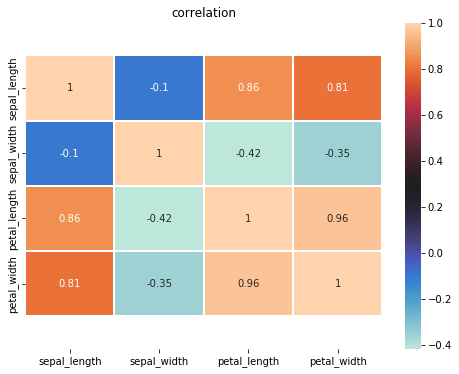

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,linewidth=True,cmap='icefire')
b,t=plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.title('correlation')

In [11]:
df.corr().loc['petal_length','petal_width']

0.9627570970509667

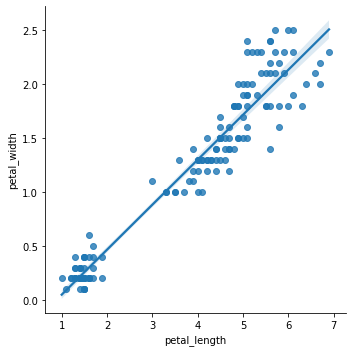

In [12]:
sns.lmplot(x='petal_length',y='petal_width',data=df)

In [13]:
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [14]:
fig=go.Figure(go.Scatter(x=df.petal_length,y=df.petal_width,mode='markers',
                        marker_color='royalblue'))
fig.update_layout(title=dict(text='correlation 0.96',font_color='darkblue',font_size=19),
                 xaxis=dict(title='petal length',title_font={'size':14,'color':'darkcyan'}),
                 yaxis=dict(title='petal width',title_font={'size':14,'color':'darkcyan'}),
                 plot_bgcolor='whitesmoke')
fig.update_xaxes(showline=True,linewidth=1,linecolor='darkgrey',gridcolor='lightgrey',gridwidth=1)
fig.update_yaxes(showline=True,linewidth=1,linecolor='darkgrey',gridcolor='lightgrey',gridwidth=1)
fig.show()

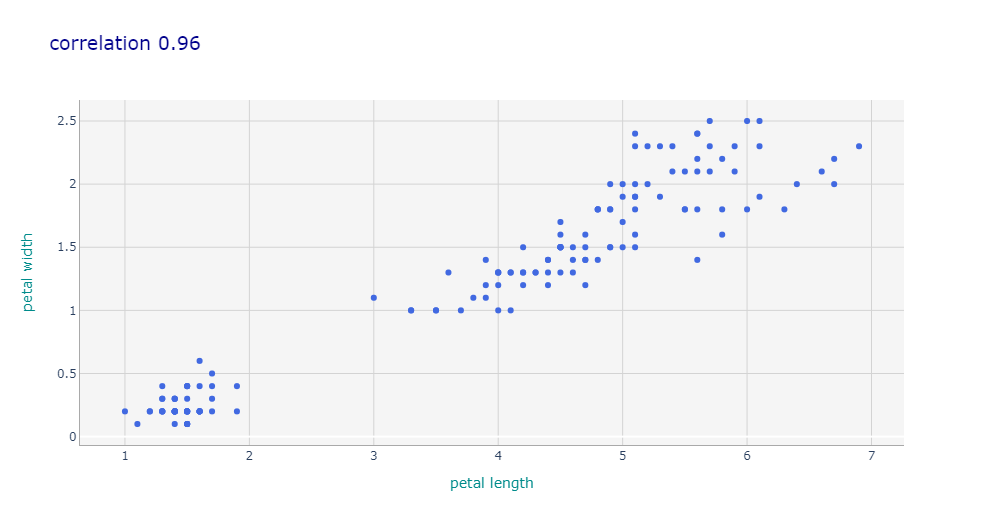

## **Previsioni** 

In [15]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [16]:
ft=['petal_length'] #predittore
x=df[ft]
y=df['petal_width'] #obiettivo
linreg.fit(x,y)

LinearRegression()

In [17]:
linreg.intercept_   #y, con x=0

-0.3665140452167275

In [18]:
float(linreg.coef_) #variazione di y, al variare di x

0.4164191322854012

In [19]:
import numpy as np

In [20]:
float(linreg.predict(np.array(7).reshape(-1,1))) #valore y, con x=7

2.548419880781081

In [21]:
#implemento grafico precedente con linea di best fit (già vista con seaborn)

fig=go.Figure()
fig.add_trace(go.Scatter(x=df.petal_length,y=df.petal_width,mode='markers',
                        marker_color='royalblue'))
fig.add_trace(go.Scatter(x=[0,7],y=[linreg.intercept_,float(linreg.predict(np.array(7).reshape(-1,1)))],
                        line=dict(color='gold'),name='best fit'))
fig.update_layout(title=dict(text='correlation 0.96',font_color='darkblue',font_size=19),
                 xaxis=dict(title='petal length',title_font={'size':14,'color':'darkcyan'}),
                 yaxis=dict(title='petal width',title_font={'size':14,'color':'darkcyan'}),
                 plot_bgcolor='whitesmoke')
fig.update_xaxes(showline=True,linewidth=1,linecolor='darkgrey',gridcolor='lightgrey',gridwidth=1)
fig.update_yaxes(showline=True,linewidth=1,linecolor='darkgrey',gridcolor='lightgrey',gridwidth=1)
fig.show()

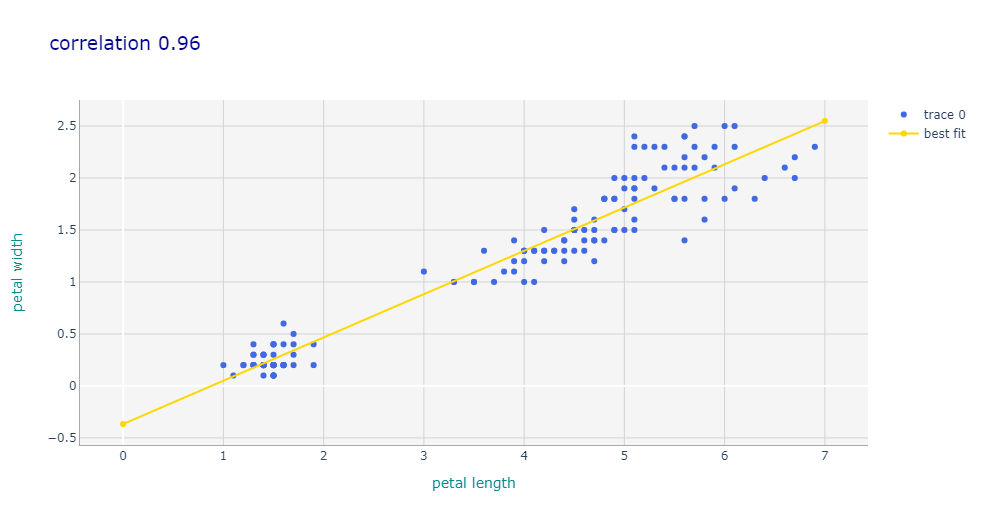

In [22]:
#se aggiungo predittori la previsione è più accurata?

In [23]:
ft2=['sepal_length','sepal_width','petal_length']
x=df[ft2]
y=df['petal_width']
linreg.fit(x,y)

LinearRegression()

In [24]:
linreg.coef_

array([-0.18848555,  0.21425277,  0.51386882])

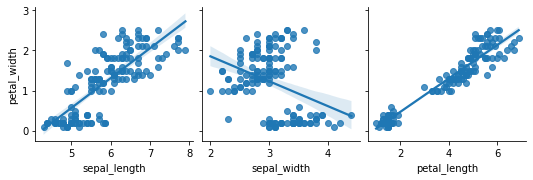

In [25]:
sns.pairplot(df,x_vars=ft2,y_vars='petal_width',kind='reg')

In [26]:
#sepal length: grafico verso alto, coef negativo
#sepal width: grafico verso basso, coef positivo
#petal length: grafico verso alto, coef positivo: unico ok

#uso anche le metriche

In [27]:
from sklearn import metrics

In [28]:
y_pred=linreg.predict(x) 

In [29]:
#confronto y reale con y previsione (con 3 predittori)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y,y_pred))) #radice dell'errore quadratico medio
print('MSE :',metrics.mean_squared_error(y,y_pred))          #errore quadratico medio
print('MAE :',metrics.mean_absolute_error(y,y_pred))         #scarto medio assoluto

RMSE: 0.19061323654436763
MSE : 0.036333405945919044
MAE : 0.14597055123459868


In [30]:
#confronto con singoli predittori (petal length, sepal length, sepal width)
#1.petal length
ft_pl=['petal_length']
x=df[ft_pl]
y=df['petal_width']
linreg.fit(x,y)
y_pred=linreg.predict(x)
print('petal length')
print('RMSE:',np.sqrt(metrics.mean_squared_error(y,y_pred)))
print('MSE :',metrics.mean_squared_error(y,y_pred))
print('MAE :',metrics.mean_absolute_error(y,y_pred))

petal length
RMSE: 0.20564519522586527
MSE : 0.04228994631948424
MAE : 0.1572565947049201


In [31]:
#2.sepal length
ft_sl=['sepal_length']
x=df[ft_sl]
y=df['petal_width']
linreg.fit(x,y)
y_pred=linreg.predict(x)
print('sepal length')
print('RMSE:',np.sqrt(metrics.mean_squared_error(y,y_pred)))
print('MSE :',metrics.mean_squared_error(y,y_pred))
print('MAE :',metrics.mean_absolute_error(y,y_pred))

sepal length
RMSE: 0.4506258023999638
MSE : 0.20306361378861124
MAE : 0.3687543332092468


In [32]:
#3.sepal width
ft_sw=['sepal_width']
x=df[ft_sw]
y=df['petal_width']
linreg.fit(x,y)
y_pred=linreg.predict(x)
print('sepal width')
print('RMSE:',np.sqrt(metrics.mean_squared_error(y,y_pred)))
print('MSE :',metrics.mean_squared_error(y,y_pred))
print('MAE :',metrics.mean_absolute_error(y,y_pred))

sepal width
RMSE: 0.7114450791231062
MSE : 0.5061541006084828
MAE : 0.6011914336493729


In [33]:
#valore minore con petal length,altri solo rumore

### divido il dataset

In [34]:
#per non creare overfitting (uso x per predire x) divido il dataset (addestramento e collaudo)
#controllo se previsione si verifica realmente, o quanto ci va vicina

In [35]:
from sklearn.model_selection import train_test_split

In [38]:
ft=['petal_length']
x=df[ft]
y=df['petal_width']
x_train,x_test,y_train,y_test=train_test_split(x,y) #suddivido
linreg.fit(x_train,y_train)                         #addestro
y_pred=linreg.predict(x_test)                       #prevedo
np.sqrt(metrics.mean_squared_error(y_test,y_pred))  #RMSE

0.1914066707667481

#### Modello nullo (risposta media)

In [39]:
avg=df.petal_width.mean() #valore medio

In [40]:
#lunghezza df
len(df)

150

In [41]:
#creo una lista di soli valori medi (lunga come df)
prova=[]
for x in range(150):
    prova.append(avg)

In [42]:
#RMSE di risposta media
np.sqrt(metrics.mean_squared_error(y,prova))

0.7606126185881716

In [43]:
#RMSE >>. regressione funziona (0.19).
#posso usare regressione per predire valore di petal width conoscendo valore di petal length

In [44]:
float(linreg.predict(np.array(20).reshape(-1,1)))

7.894993904280257